In [1]:
import pandas as pd

# Load Data

In [2]:
path = './2020_happy.xls'
df = pd.read_excel (path)
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


# Check DataType

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [4]:
for i in df.columns[2:]:
    df[f'{i}'].astype(float)

In [5]:
# df.to_csv('./2020_happy')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Correlation

In [7]:
sample = df.iloc[:, [2,6,7,8,9,10,11]]

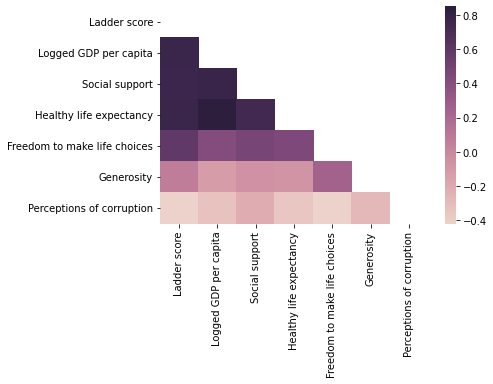

In [12]:
# dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
colors = sns.cubehelix_palette(as_cmap=True)
mask = np.triu(np.ones_like(sample.corr()))
dataplot = sns.heatmap(sample.corr(), cmap=colors, mask=mask)
plt.savefig('heatmap.png')

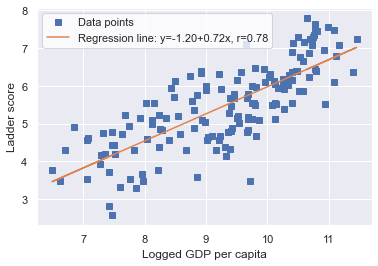

[Ladder score] [Logged GDP per capita] 
positive correlation: 0.7753744007429202
Correlation is significant



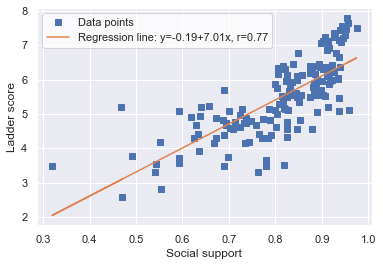

[Ladder score] [Social support] 
positive correlation: 0.7650007565918077
Correlation is significant



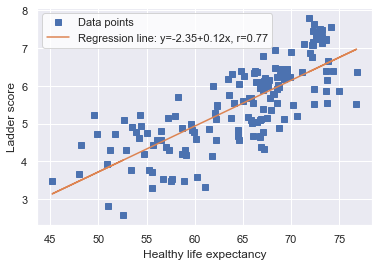

[Ladder score] [Healthy life expectancy] 
positive correlation: 0.7703162898858044
Correlation is significant



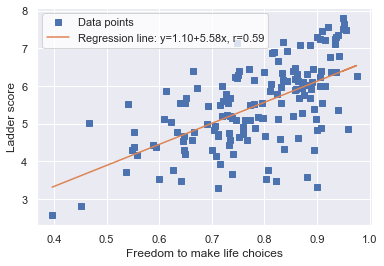

[Ladder score] [Freedom to make life choices] 
positive correlation: 0.5905967827668822
Correlation is significant



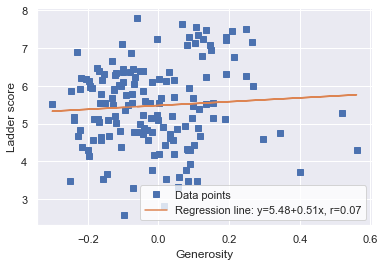

[Ladder score] [Generosity] 
positive correlation: 0.06904312651151726
Correlation is NOT significant



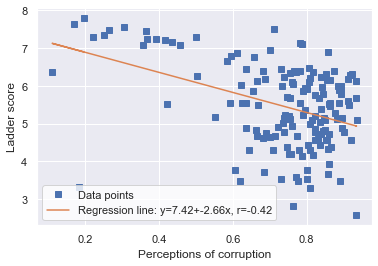

[Ladder score] [Perceptions of corruption] 
negative correlation: -0.4183050872675626
Correlation is significant



In [16]:
def scatter_plot(data_name, x, y):
    slope, intercept, r, *__ = scipy.stats.linregress(data_name[x], data_name[y])
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    fig, ax = plt.subplots()
    ax.plot(data_name[x], data_name[y], linewidth=0, marker='s', label='Data points')
    ax.plot(data_name[x], intercept + slope * data_name[x], label=line)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend(facecolor='white')
    plt.savefig(f'corr_{x}.png')
    plt.show()

def get_corr(data_name, a, b):
    alpha = 0.01
    r, p_value = scipy.stats.pearsonr(data_name[a], data_name[b])
    if r > 0:
        print(f'[{a}] [{b}] \npositive correlation: {r}')
    elif r < 0:
        print(f'[{a}] [{b}] \nnegative correlation: {r}')
    if p_value <= alpha:
        print(f'Correlation is significant\n')
    else:
        print(f'Correlation is NOT significant\n')
    return r

rank = []
name = []
variables = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']  
y = 'Ladder score'

for i in variables:
    scatter_plot(sample, i, y)
    r = get_corr(sample, 'Ladder score', i)
    rank.append(abs(r))
    name.append(i)
    

In [18]:
#Order variables from highest to lowest correlation
zipped = zip(name, rank)
ranked = sorted(zipped, key = lambda x: x[1], reverse=True)

In [19]:
ranked = ranked[:-1]

# Pie Chart

- The percentages denote the relative size of each value compared to their sum.

In [20]:
from scipy.special import softmax
name = [r[0] for r in ranked]
r = [r[1] for r in ranked]

In [21]:
name

['Logged GDP per capita',
 'Healthy life expectancy',
 'Social support',
 'Freedom to make life choices',
 'Perceptions of corruption']

In [22]:
r

[0.7753744007429202,
 0.7703162898858044,
 0.7650007565918077,
 0.5905967827668822,
 0.4183050872675626]

In [23]:
softmax_R = softmax(r)
softmax_R

array([0.22145217, 0.22033487, 0.21916678, 0.18409078, 0.1549554 ])

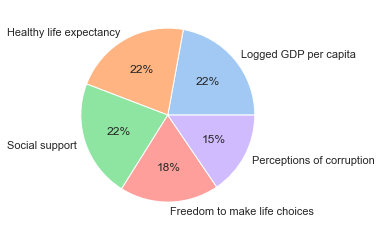

In [25]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(softmax_R, labels = name, colors = colors, autopct='%.0f%%')
plt.savefig('piechart.png')
plt.show()